In [13]:
import numpy as np
import pandas as pd
import os
import kmapper as km
from sas7bdat import SAS7BDAT


In [130]:
# Get the path of the notebook file
notebook_path = os.path.abspath('__file__')

# Directory containing the notebook file
notebook_directory = os.path.dirname(notebook_path)

## Sample Mapper Algorithm

In [93]:
# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create a cover with 10 elements
cover = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=cover)

# Visualize it
mapper.visualize(graph, path_html=notebook_directory+"/make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 248 edges and 94 nodes in 0:00:00.104497.
Wrote visualization to: /Users/himanshuyadav/Desktop/WISE/make_circles_keplermapper_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>make_circles(n_samples=5000, noise=0.03, factor=0.3) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\

## Loading the file for analysis and preprocessing

In [15]:
# Specify the path to your SAS7BDAT file
sas7bdat_file = notebook_directory+"/Data/wise1compdata10212019(1).sas7bdat"

# Use a context manager to open the SAS7BDAT file
with SAS7BDAT(sas7bdat_file) as f:
    # Read the dataset from the SAS7BDAT file
    df = f.to_data_frame()

In [27]:
# If you want to drop columns with a threshold for NaN values (e.g., only drop columns with more than 30% NaN values)
# you can specify the 'thresh' parameter
df_70 = df.dropna(axis=1, thresh=len(df) * 0.7)

In [192]:
# Select columns with numerical values
numerical_df = df_70.select_dtypes(include=['number'])

In [193]:
# Fill NaN values in each column with the column-wise mean
filled_numerical_df = numerical_df.fillna(numerical_df.mean())

In [194]:
# Find columns with only one unique value
unique_value_columns = [col for col in filled_numerical_df.columns if filled_numerical_df[col].nunique() == 1]

print(unique_value_columns)

#Dropping the columns which has only one value
filled_numerical_df = filled_numerical_df.drop(unique_value_columns,axis=1)

['TIME', 'RRDQC', 'AFVOT']


In [195]:
filled_numerical_df

,HEALT,QOL,STQOL,HIPN,CNPN,PEPN,GORT,AGNA,CHTPN,UNANG,...,MIEVT,PTCAEVT,TMOTHER,TMSURG,TMCONT,newdeath,cvdeath,death,durdeath,censordays
0,4.0,8.0,8.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,...,0.0,1.0,810.0,810.0,810.0,0.113548,1.0,1.0,810.0,810.0
1,4.0,10.0,8.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,94.0,2154.0,2154.0,0.113548,1.0,1.0,2154.0,2154.0
2,3.0,5.0,5.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,...,0.0,0.0,1234.0,1453.0,1453.0,0.000000,0.0,0.0,4116.0,4116.0
3,3.0,6.0,6.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,...,0.0,0.0,1637.0,3335.0,3335.0,0.000000,0.0,0.0,4101.0,4101.0
4,3.0,8.0,8.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,1098.0,1098.0,1098.0,0.000000,0.0,0.0,4085.0,4085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,4.0,8.0,8.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1751.0,1751.0,1751.0,0.000000,0.0,0.0,2932.0,2932.0
935,4.0,7.0,7.0,1.0,1.0,1.0,1.0,0.0,4.0,0.0,...,0.0,1.0,458.0,2123.0,2123.0,1.000000,0.0,1.0,2718.0,2718.0
936,4.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,...,0.0,0.0,436.0,436.0,1455.0,0.000000,1.0,1.0,1455.0,1455.0
937,4.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,5.0,1.0,...,0.0,1.0,85.0,580.0,580.0,0.000000,1.0,1.0,580.0,580.0


In [196]:
unscaled_filled_numerical_df = filled_numerical_df.copy()

## Mapper

In [197]:
from sklearn.preprocessing import StandardScaler

#Doing standar scaling so the data has 0 mean and 1 standard deviation 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(filled_numerical_df)
filled_numerical_df[filled_numerical_df.columns] = scaler.fit_transform(filled_numerical_df[filled_numerical_df.columns])

In [207]:
#scaled filtered_numerical_df
unscaled_filled_numerical_df["durdeath"]

0       810.0
1      2154.0
2      4116.0
3      4101.0
4      4085.0
        ...  
934    2932.0
935    2718.0
936    1455.0
937     580.0
938     867.0
Name: durdeath, Length: 939, dtype: float64

In [143]:
# Save the DataFrame to a CSV file
filled_numerical_df.to_csv(notebook_directory+'/Data/filled_numerical_df.csv', index=False)  # Set index=False to omit writing row numbers

In [135]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import umap

# Initialize
mapper = km.KeplerMapper(verbose=2)

# Define the clustering algorithm and its parameters
clusterer = DBSCAN(eps=40, min_samples=5, metric='euclidean')

# Define the projection method
lens = mapper.fit_transform(data_scaled, 
                            umap.UMAP(n_neighbors=10, n_components=3, metric='euclidean')
                            #projection=PCA(n_components=3)
                            )

# Create the topological network
graph = mapper.map(lens, X=data_scaled, clusterer=clusterer)

# Visualize it
mapper.visualize(graph, path_html=notebook_directory+"/WISE_keplermapper_output.html",include_searchbar=True,
                 title="WISE")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: UMAP(n_components=3, n_neighbors=10)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (939, 332)

..Projecting data using: 
	UMAP(n_components=3, n_neighbors=10, verbose=2)

UMAP(n_components=3, n_neighbors=10, verbose=2)
Sun Oct 15 17:35:35 2023 Construct fuzzy simplicial set
Sun Oct 15 17:35:35 2023 Finding Nearest Neighbors
Sun Oct 15 17:35:35 2023 Finished Nearest Neighbor Search
Sun Oct 15 17:35:35 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun Oct 15 17:35:36 2023 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (939, 332) using lens shaped (939, 3)

Minimal points in hypercube before clustering: 5
Creating 1000 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

   > Found 0 clusters in hypercube 8.
Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

   > Found 1 clusters in hypercube 13.
Cube_14 is empty.

   > Found 1 clusters in hypercube 15.
Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

Cube_20 is empty.

   > Found 1 clusters in hyper

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>WISE | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 700;\n

## Selected Variables

In [213]:
# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
select_variables = pd.read_excel(notebook_directory+'/Data/Variables.xlsx')

variables_list = []
for var in select_variables["Variable"].to_list():
    if var in filled_numerical_df.columns.tolist():
        variables_list.append(var)

In [214]:
select_variables_df = filled_numerical_df[variables_list]
unscaled_select_variables_df = unscaled_filled_numerical_df[variables_list]

variables_list.append("newdeath")
variables_list.append("durdeath")
select_variables_death_df = filled_numerical_df[variables_list]
unscaled_select_variables_death_df = unscaled_filled_numerical_df[variables_list]

# Save the DataFrame to a CSV file
select_variables_df.to_csv(notebook_directory+'/Data/select_variables_df.csv', index=False)  # Set index=False to omit writing row numbers
unscaled_select_variables_df.to_csv(notebook_directory+'/Data/unscaled_select_variables_df.csv', index=False)  # Set index=False to omit writing row numbers
select_variables_death_df.to_csv(notebook_directory+'/Data/select_variables_death_df.csv')
unscaled_select_variables_death_df.to_csv(notebook_directory+'/Data/unscaled_select_variables_death_df.csv', index=False)  # Set index=False to omit writing row numbers

In [172]:
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Define the clustering algorithm and its parameters
clusterer = DBSCAN(eps=1000, min_samples=5, metric='euclidean')

# Define the projection method
lens = mapper.fit_transform(select_variables_df, 
                            umap.UMAP(n_neighbors=100, n_components=2, metric='euclidean')
                            #projection=PCA(n_components=3)
                            )

# Create the topological network
graph = mapper.map(lens, X=select_variables_df, clusterer=clusterer)

# Visualize it
mapper.visualize(graph, path_html=notebook_directory+"/WISE_select_variable_keplermapper_output.html",include_searchbar=True,
                 title="WISE")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: UMAP(n_neighbors=100)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (939, 87)

..Projecting data using: 
	UMAP(n_neighbors=100, verbose=2)

UMAP(n_neighbors=100, verbose=2)
Mon Oct 16 10:03:32 2023 Construct fuzzy simplicial set
Mon Oct 16 10:03:32 2023 Finding Nearest Neighbors
Mon Oct 16 10:03:32 2023 Finished Nearest Neighbor Search
Mon Oct 16 10:03:32 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Oct 16 10:03:33 2023 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (939, 87) using lens shaped (939, 2)

Minimal points in hypercube before clustering: 5
Creating 100 hypercubes.
   > Found 1 clusters in hypercube 0.
Cube_1 is empty.

   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
Cube_4 is empty.

Cube_5 is empty.

   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
Cube_13 is empty.

   > Found 1 clusters in 

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>WISE | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 700;\n

## Cluster Analysis

In [217]:
up_cluster_df = pd.read_csv(notebook_directory+"/Data/up_cluster.csv")
down_cluster_df = pd.read_csv(notebook_directory+"/Data/down_cluster.csv")

In [218]:
up_cluster_df

,Unnamed: 0,SEVSCORE,CORETC,COREHDL,CORETG,CRP,IL6,SAA,TNFA,CREAT,...,PO,ANDRO,TESTO,FT,FT_AT,SHBG,DHEAS,INSULIN,newdeath,durdeath
0,0,-3.322025e-01,-6.761598e-16,0.000000,0.000000,-8.269226e-17,0.000000,-3.678295e-17,0.000000,-0.166599,...,0.000000,-3.011987e-16,-2.616605e-16,1.880426e-16,-3.439299e-16,0.000000,0.000000,1.555580e-16,0.000000,-2.231896
1,3,4.840041e+00,-6.761598e-16,0.000000,0.000000,-8.269226e-17,0.000000,-3.678295e-17,0.000000,-0.166599,...,0.000000,-3.011987e-16,-2.616605e-16,1.880426e-16,-3.439299e-16,0.000000,0.000000,1.555580e-16,-0.393953,1.110283
2,7,1.970391e+00,-6.761598e-16,0.000000,0.000000,-8.269226e-17,0.000000,-3.678295e-17,0.000000,-0.372533,...,0.000000,-3.011987e-16,-2.616605e-16,1.880426e-16,-3.439299e-16,0.000000,0.000000,1.555580e-16,-0.393953,1.079817
3,21,2.881118e+00,-6.761598e-16,0.000000,0.000000,-8.269226e-17,0.000000,-3.678295e-17,0.000000,0.245270,...,-0.286152,-9.476336e-01,-1.405140e-01,1.174469e-01,1.275801e-01,-0.535944,-0.971617,1.334189e+00,0.000000,-0.580610
4,26,-6.758731e-01,-9.277038e-01,0.010191,-0.172100,-5.534657e-01,0.000000,-2.381462e-01,0.000000,0.039336,...,4.896944,8.459908e-01,-3.393714e-01,-4.351088e-01,-4.350693e-01,-0.136005,0.417144,-1.370099e-01,-0.393953,0.986386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,931,-5.384048e-01,-9.277038e-01,-0.499549,0.454345,-5.616588e-01,0.998825,-2.364896e-01,-0.388138,0.863074,...,-0.270334,-3.011987e-16,-2.616605e-16,1.880426e-16,-3.439299e-16,0.000000,-0.141891,-9.251522e-01,3.075523,-0.482101
382,933,-6.758731e-01,-8.801233e-01,0.604887,-0.537527,-5.065417e-01,0.019175,-1.569749e-01,-1.014983,0.657139,...,1.037304,1.081785e+00,1.767044e+00,3.082775e+00,3.082763e+00,-0.832115,1.929482,-3.384241e-01,-0.393953,-0.071818
383,934,-6.758731e-01,1.451322e+00,0.774800,-0.589731,-5.929415e-01,-0.639578,-2.547117e-01,1.280548,0.451205,...,-0.296698,-9.370361e-01,-7.518164e-01,-9.248905e-01,-9.248439e-01,0.335274,-0.018315,-2.771241e-01,-0.393953,-0.076896
384,935,-5.899554e-01,-1.784153e+00,0.350017,-0.415718,-2.838388e-01,-0.922970,-2.513986e-01,-0.771777,0.039336,...,-0.291425,-1.040362e+00,-6.045146e-01,-1.263674e+00,-1.263622e+00,3.253744,-0.946117,-3.997240e-01,3.075523,-0.294224


In [231]:
up_index = up_cluster_df["Unnamed: 0"].to_list()
down_index = down_cluster_df["Unnamed: 0"].to_list()

In [247]:
up_unscalled_durdeath_list = unscaled_filled_numerical_df["durdeath"].iloc[up_index].to_list()
down_unscalled_durdeath_list = unscaled_filled_numerical_df["durdeath"].iloc[down_index].to_list()
up_cluster_df["unscalled_durdeath"] = up_unscalled_durdeath_list
down_cluster_df["unscalled_durdeath"] = down_unscalled_durdeath_list

In [264]:
up_unscalled_newdeath_list = unscaled_filled_numerical_df["newdeath"].iloc[up_index].to_list()
down_unscalled_newdeath_list = unscaled_filled_numerical_df["newdeath"].iloc[down_index].to_list()

In [263]:
# Sample lists of numerical values
list1 = up_unscalled_durdeath_list
list2 = down_unscalled_durdeath_list

from scipy import stats

# Calculate various statistical measures for each list
mean_list1 = np.mean(list1)
median_list1 = np.median(list1)
std_dev_list1 = np.std(list1)
min_list1 = np.min(list1)
max_list1 = np.max(list1)

mean_list2 = np.mean(list2)
median_list2 = np.median(list2)
std_dev_list2 = np.std(list2)
min_list2 = np.min(list2)
max_list2 = np.max(list2)

# Print the results
print("Up Cluster DurDeath Statistics")
print("Mean:", mean_list1)
print("Median:", median_list1)
print("Standard Deviation:", std_dev_list1)
print("Minimum:", min_list1)
print("Maximum:", max_list1)

print("\nDown Cluster DurDeath Statistics:")
print("Mean:", mean_list2)
print("Median:", median_list2)
print("Standard Deviation:", std_dev_list2)
print("Minimum:", min_list2)
print("Maximum:", max_list2)

# Perform a two-sample t-test
print("\nPerform a two sampe t-test")
t_statistic, p_value = stats.ttest_ind(list1, list2)
print("T_score:",t_statistic)
print("p_value:",p_value)

Up Cluster DurDeath Statistics
Mean: 2896.4300518134714
Median: 3211.0
Standard Deviation: 1018.0380814403219
Minimum: 0.0
Maximum: 4101.0

Down Cluster DurDeath Statistics:
Mean: 3234.0528287905545
Median: 3412.0
Standard Deviation: 781.3874343499187
Minimum: 4.0
Maximum: 4134.0

Perform a two sampe t-test
T_score: -5.348291102534878
p_value: 1.1534166098407052e-07


In [266]:
# Sample lists of numerical values
list1 = up_unscalled_newdeath_list
list2 = down_unscalled_newdeath_list

from scipy import stats

# Calculate various statistical measures for each list
mean_list1 = np.mean(list1)
median_list1 = np.median(list1)
std_dev_list1 = np.std(list1)
min_list1 = np.min(list1)
max_list1 = np.max(list1)

mean_list2 = np.mean(list2)
median_list2 = np.median(list2)
std_dev_list2 = np.std(list2)
min_list2 = np.min(list2)
max_list2 = np.max(list2)

# Print the results
print("Up Cluster NewDeath Statistics")
print("Mean:", mean_list1)
print("Median:", median_list1)
print("Standard Deviation:", std_dev_list1)
print("Minimum:", min_list1)
print("Maximum:", max_list1)

print("\nDown Cluster NewDeath Statistics:")
print("Mean:", mean_list2)
print("Median:", median_list2)
print("Standard Deviation:", std_dev_list2)
print("Minimum:", min_list2)
print("Maximum:", max_list2)

# Perform a two-sample t-test
print("\nPerform a two sampe t-test")
t_statistic, p_value = stats.ttest_ind(list1, list2)
print("T_score:",t_statistic)
print("p_value:",p_value)

Up Cluster NewDeath Statistics
Mean: 0.14152766170817316
Median: 0.0
Standard Deviation: 0.31887218453513244
Minimum: 0.0
Maximum: 1.0

Down Cluster NewDeath Statistics:
Mean: 0.08265812411532444
Median: 0.0
Standard Deviation: 0.2529235102997919
Minimum: 0.0
Maximum: 1.0

Perform a two sampe t-test
T_score: 2.9378552374078333
p_value: 0.0033978695317539373


In [272]:
up_unscalled_durdeath_list

[810.0,
 4101.0,
 4071.0,
 2436.0,
 3979.0,
 3946.0,
 3939.0,
 3923.0,
 3885.0,
 3883.0,
 1996.0,
 1154.0,
 2592.0,
 3847.0,
 3780.0,
 3140.0,
 3395.0,
 3724.0,
 3693.0,
 3680.0,
 3674.0,
 3624.0,
 3603.0,
 3591.0,
 1216.0,
 3584.0,
 3582.0,
 3290.0,
 2052.0,
 2110.0,
 3538.0,
 3512.0,
 3484.0,
 3450.0,
 3442.0,
 3435.0,
 3367.0,
 3258.0,
 3239.0,
 3149.0,
 3140.0,
 3113.0,
 2270.0,
 3091.0,
 3091.0,
 1585.0,
 1925.0,
 2199.0,
 3077.0,
 1624.0,
 1673.0,
 3077.0,
 3077.0,
 1667.0,
 3056.0,
 1863.0,
 1121.0,
 3056.0,
 3035.0,
 3035.0,
 2276.0,
 163.0,
 3014.0,
 3014.0,
 1366.0,
 1232.0,
 3000.0,
 89.0,
 2993.0,
 2981.0,
 2971.0,
 2966.0,
 2944.0,
 2944.0,
 2939.0,
 4066.0,
 4053.0,
 2683.0,
 1507.0,
 4044.0,
 4039.0,
 1501.0,
 4009.0,
 4002.0,
 1546.0,
 3995.0,
 3993.0,
 2708.0,
 3980.0,
 3334.0,
 3960.0,
 3953.0,
 1644.0,
 438.0,
 1180.0,
 3934.0,
 2625.0,
 1464.0,
 1570.0,
 1714.0,
 2464.0,
 1913.0,
 3835.0,
 1512.0,
 1499.0,
 3681.0,
 3805.0,
 2648.0,
 3062.0,
 2738.0,
 2233.0,
 1086.

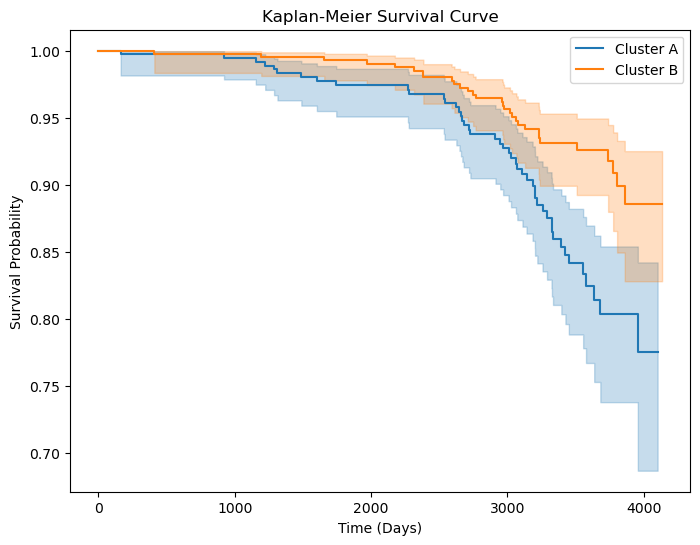

In [280]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Example data for two groups (replace with your own data)
group1_days = up_unscalled_durdeath_list
group1_deaths = up_unscalled_newdeath_list

group2_days = down_unscalled_durdeath_list
group2_deaths = down_unscalled_newdeath_list

# Create DataFrames for each group
group1_data = pd.DataFrame({'days': group1_days, 'deaths': group1_deaths})
group2_data = pd.DataFrame({'days': group2_days, 'deaths': group2_deaths})

# Create Kaplan-Meier estimators for each group
kmf_group1 = KaplanMeierFitter()
kmf_group2 = KaplanMeierFitter()

# Fit the estimators to the data for each group
kmf_group1.fit(group1_data['days'], event_observed=group1_data['deaths'], label='Cluster A')
kmf_group2.fit(group2_data['days'], event_observed=group2_data['deaths'], label='Cluster B')

# Plot both Kaplan-Meier curves on the same plot
plt.figure(figsize=(8, 6))
plt.title('Kaplan-Meier Survival Curve')
kmf_group1.plot()
kmf_group2.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.legend(loc='best')


# Save the plot with 300 DPI resolution
plt.savefig('kaplan_meier_plot.png', dpi=300)
plt.show()